

---

```
CISC 3440: Machine Learning
P1 (25+5 Points)
Due: Oct 7th, 11:59 pm
```
---
**Submission Instructions**


* You are expected to complete this project on your own (not with a partner).
* Please refer to the syllabus for the late submission policy.
* You must submit your assignment via Blackboard.
* Your code should work without errors; code that fails will not be graded.


We will work on Kaggle competition Dataset (https://www.kaggle.com/competitions/titanic/data?select=train.csv) for this project. You will use Decistion Tree Classifer to predict if a passenger on Titanic ship would survive or not. You are provided with one file train.csv to build your Tree. You are also provided with some started code to read files and process them.

**Data Features:** Each line in the file has the following Features


| Variable  | Definition                                   | Key                                      |
|-----------|----------------------------------------------|------------------------------------------|
| survival  | Survival -Label                                     | 0 = No, 1 = Yes                          |
| pclass    | Ticket class                                 | 1 = 1st, 2 = 2nd, 3 = 3rd                |
| sex       | Sex                                          |                                          |
| Age       | Age in years                                 |                                          |
| sibsp     | # of siblings / spouses aboard the Titanic   |                                          |
| parch     | # of parents / children aboard the Titanic   |                                          |
| fare      | Passenger fare                               |                                          |
| embarked  | Port of Embarkation                          | C = Cherbourg, Q = Queenstown, S = Southampton |

**First Row**

| Survived | Pclass | Sex  | Age | SibSp | Parch | Fare | Embarked |
|----------|--------|------|-----|-------|-------|------|----------|
| 0        | 3      | male | 22  | 1     | 0     | 7.25 | S        |


The function below reads the data and qunatizes them using the following criteria:

    - Pclass: remains as an integer.
    - Sex: 'male' is mapped to 0, 'female' to 1.
    - Age: divided by 10 and truncated to an integer.
    - SibSp: remains as an integer.
    - Parch: remains as an integer.
    - Fare: remains as a floating-point number.
    - Embarked: 'S' is mapped to 0, 'C' to 1, 'Q' to 2, and unknown values to

<u>Feel free to change the quantization in any way you see fit. However, you are not required to make any changes to this part of the code.</u>

In [16]:
# Global Constants for column indices
PCLASS = 0
SEX = 1
AGE = 2
SIBSP = 3
PARCH = 4
FARE = 5
EMBARKED = 6
attribute_list = ["PCLASS", "SEX", "AGE", "SIBSP", "PARCH", "FARE", "EMBARKED"]

In [17]:
import numpy as np

# Main list --> (Quantized features) + (Labels if survived)
def get_data_and_labels(filename, contains_label=True):
    '''
    This function reads data from a CSV file, processes it, and returns two numpy arrays:
    one with quantized features and another with labels (if labels are present).

    ARGS:

    filename : str
        The path to the CSV file containing the data.

    contains_label : bool, optional
        A flag indicating whether the input file contains labels (default is True).

    Returns:
    quantized_features : list of list
        A list of lists where each inner list contains the quantized features for each data entry.

    labels : list
        A list containing labels for each data entry if `contains_label` is True.

    Note:
    The function assumes that the input CSV file has the following columns in order:
    Pclass, Sex, Age, SibSp, Parch, Fare, and Embarked.

    The quantization process:
    - Pclass: remains as an integer.
    - Sex: 'male' is mapped to 0, 'female' to 1.
    - Age: divided by 10 and truncated to an integer.
    - SibSp: remains as an integer.
    - Parch: remains as an integer.
    - Fare: remains as a floating-point number.
    - Embarked: 'S' is mapped to 0, 'C' to 1, 'Q' to 2, and unknown values to -1.
    '''


    # Open the file and read all lines except the header
    file = open(filename, 'r')
    data = file.readlines()[1:]  # Skip the header

    # Extract labels and features if the file contains labels
    if contains_label:
        labels = [int(x.strip('\n').split(',')[0]) for x in data]
        features = [x.strip('\n').split(',')[1:] for x in data]
    else:
        features = [x.strip('\n').split(',') for x in data]

    quantized_features = []

    # Process each feature and quantize them
    for feature in features:
        quantized_feature = []
        for column in range(len(feature)):
            if column == PCLASS:
                quantized_feature.append(int(feature[column]))  # Pclass: as is
            elif column == SEX:
                if feature[column] == 'male':
                    quantized_feature.append(0)  # Sex: 'male' -> 0
                else:
                    quantized_feature.append(1)  # Sex: 'female' -> 1
            elif column == AGE:
                try:
                    quantized_feature.append(int(float(feature[column]) // 10))  # Age: decade-wise quantization
                except:
                    quantized_feature.append(-1)  # Missing age: represented as -1
            elif column == SIBSP:
                quantized_feature.append(int(feature[column]))  # SibSp: as is
            elif column == PARCH:
                quantized_feature.append(int(feature[column]))  # Parch: as is
            elif column == FARE:
                quantized_feature.append(int(float(feature[column]) // 30))  # Fare: Quantized as multiples of 30
            else:
                # Embarked: map 'S' -> 0, 'C' -> 1, 'Q' -> 2, unknown -> -1
                if feature[column] == 'S':
                    quantized_feature.append(0)
                elif feature[column] == 'C':
                    quantized_feature.append(1)
                elif feature[column] == 'Q':
                    quantized_feature.append(2)
                else:
                    quantized_feature.append(-1)
        quantized_features.append(quantized_feature)

    return quantized_features, labels if contains_label else None


**[3 points] Computing Entropy**
The function below has the skeleton for you to fill in the code to compute entropy. Entropy is based on the porbability distribiution of different values for the labels

The entropy \( $H(L)$ \) is defined as:

$H(L) = -\sum_{i=1}^{c} p_i \log_2(p_i)$

where:
- \( $p_i$ \) is the probability of class \( $i$ \),
- \( $c$ \) is the total number of classes.
- L is our label probability distribution


In [18]:
""" 
features, labels: Seperating features and labels into individual lists

TOTAL: Global constant for the total # of passengers
"""
features, labels = get_data_and_labels("train.csv", True)

In [19]:
import math as math

def compute_entropy(labels):
  """
    Computes the entropy of a set of labels.

    Args:
        labels (list or array-like): The list of labels for which entropy is to be computed.

    Returns:
        float: The entropy of the label set.

    features:
        ["PCLASS", "SEX", "AGE", "SIBSP", "PARCH", "FARE", "EMBARKED"]
    
    labels:
        Alive or dead (1 or 0)

  """
  # Initalize entropy
  entropy = 0
  total = len(labels)
  ''' 
  # Calculating probability of survival, given the label
  survived = len([doa for doa in labels if doa == 1])
  prob_survived = survived/TOTAL


  not_survived = len([doa for doa in labels if doa == 0])
  prob_not_survived = not_survived/TOTAL
  '''
  # Calculate the probability of survival
  survive_list = []
  for doa in labels:
    if doa == 1:
      survive_list.append(doa)

  prob_survived = len(survive_list) / total

  # Calculating the probability of not surviving
  not_survive_list = []
  for doa in labels:
    if doa == 0:
        not_survive_list.append(doa)

  prob_not_survived = len(not_survive_list) / total

  # Calculating entropy
  if prob_survived > 0: # Check if count were zero
    entropy -= prob_survived * math.log2(prob_survived)
    
  if prob_not_survived > 0:
    entropy -= prob_not_survived * math.log2(prob_not_survived)

  return entropy

compute_entropy(labels)


0.9684133894685154


You might find the function below useful for implementing the function to compute information gain in the next section.

In [20]:
def split_by_feature_value(data, labels, feature_name):
    """
    Splits the dataset into subsets based on unique values of the specified feature.

    ARGS:

    data : np.ndarray
        A 2D numpy array where each row represents a data instance and each column
        represents a feature.
    labels : list or np.ndarray
        A 1D array or list containing the labels corresponding to the data instances.
    feature_name : int
        The index of the feature (column) by which to split the data.

    Returns:

    spilt_labels : dict
        A dictionary where the keys are the unique values of the specified feature, and
        the values are numpy arrays of labels corresponding to each unique feature value.
    """

    # Initialize an empty dictionary to hold the split labels
    spilt_labels = {}
    split_data={}

    # Get the unique values of the specified feature
    feature_values = set(data[:, feature_name].tolist())

    # Iterate over each unique feature value
    for feature_value in feature_values:
        # Get the labels corresponding to the current feature value
        spilt_labels[feature_value] = np.array(labels)[np.argwhere(data[:, feature_name] == feature_value).reshape(-1)].tolist()
        split_data[feature_value]=data[np.argwhere(data[:, feature_name] == feature_value).reshape(-1)]

    return spilt_labels,split_data



**[5 points] Computting Information Gain**

$Information Gain(L,A)=Entropy(L)- \sum_v\frac{L_v}{L}Entropy(L_v)$
Where:
  - Entropy (L) - should use the function compute_entropy()
  - L - The labels without split based on attribute values
  - A - is the attribute
  - v - represents the different values that the attribute can take
  - $L_v$ - reprensets the labels correspdoning to the attribute A with value v

Please fill in the code below to compute the information gain for an attribute which is indicate through the feature name

In [21]:
def compute_information_gain(data, labels, feature_name):
  """
    Computes the information gain of a given feature in the dataset.

    Args:
        data (list or array-like): The dataset containing the features.
        labels (list or array-like): The list of labels corresponding to each data point.
        feature_name (str): The name of the feature or attribute for which information gain is computed.

    Returns:
        float: The information gain achieved by splitting the dataset using the given feature.
    """
  information_gain = 0 # Initalize info_gain
  label_entropy = compute_entropy(labels) # Label entropy
  total = len(labels)
  w_entropy = 0 # Sum of entropies for the feature's split weighted by the proportions of the subsets.
  
  split_labels, split_data = split_by_feature_value(np.array(data), labels, feature_name)
  # split_labels: unique value of the feature is a key, and the corresponding labels are the values
  # split_data: sub lists of the data for each feature value
  
  # Finding the weighted entropy of the features
  
  for feature_value, feature_labels in split_labels.items(): # feature_value, is not used because it's not needed for calculating the weighted entropy 
    feature_entropy = compute_entropy(feature_labels)
    list_protion = len(feature_labels) / total
    w_entropy += list_protion * feature_entropy

  information_gain = label_entropy - w_entropy

  return information_gain

print("Information Gain of PCLASS:",compute_information_gain(features, labels, PCLASS))
print("Information Gain of SEX:",compute_information_gain(features, labels, SEX))
print("Information Gain of AGE:",compute_information_gain(features, labels, AGE))
print("Information Gain of SIBSP:",compute_information_gain(features, labels, SIBSP))
print("Information Gain of PARCH:",compute_information_gain(features, labels, PARCH))
print("Information Gain of FARE:",compute_information_gain(features, labels, PCLASS))
print("Information Gain of EMBARKED:",compute_information_gain(features, labels, EMBARKED))


Information Gain of PCLASS: 0.08006439577276692
Information Gain of SEX: 0.20712245739233137
Information Gain of AGE: 0.02584572818562625
Information Gain of SIBSP: 0.030000179405581084
Information Gain of PARCH: 0.023820335149094207
Information Gain of FARE: 0.08006439577276692
Information Gain of EMBARKED: 0.023471433564814292


**Create Training and Validation Data splits**

The function below will take the dataset and labels and create random splits based on given percentage.

In [22]:
def create_training_validation_split(data,labels,split_percentage):
  """
    Splits a dataset into training and validation sets based on a given split percentage.

    ARGS:
    ----------
    data : numpy.ndarray
       The data to be split into train and validation

    labels : list
        The corresponding labels for the data

    split_percentage : float
        A float between 0 and 1 that specifies the proportion of the dataset to allocate to the training set.
        For example, 0.8 would allocate 80% of the data to the training set and the remaining 20% to the validation set.

    Returns:
    -------
    tuple : (train_features, train_labels, validation_features, validation_labels)
        - train_features : numpy.ndarray
            The feature data for the training set.
        - train_labels : numpy.ndarray
            The corresponding labels for the training set.
        - validation_features : numpy.ndarray
            The feature data for the validation set.
        - validation_labels : numpy.ndarray
            The corresponding labels for the validation set.
  """
  import random
  import numpy as np

  train_features = []
  train_labels = []
  validation_features=[]
  validation_labels=[]
  total_sample_count = len(data)
  train_sample_count = int(split_percentage*total_sample_count)
  validation_sample_count=total_sample_count-train_sample_count
  train_indices = random.sample(range(total_sample_count),train_sample_count)
  validation_indices = random.sample(list(set(range(total_sample_count))-set(train_indices)),validation_sample_count)
  for i in range(total_sample_count):
    if i in train_indices:
      train_features.append(data[i])
      train_labels.append(labels[i])
    if i in validation_indices:
      validation_features.append(data[i])
      validation_labels.append(labels[i])
  return np.array(train_features),np.array(train_labels),np.array(validation_features),np.array(validation_labels)

**Testing your Functions**

The code below computes the entropy of the entire dataset and the attribute with the highest information gain.
- Q1) [1 point] What is the entropy of the dataset?
- Q2) [1 point] What is the attribute with the highest information gain?

<u>You will type the answers to these questions in a separate text document you will find details for this in the Submission Instructions below </u>

**[15 points] Building the Decision Tree**

Using Sklearn Decision Tree library. Here you will build upon the tutorial we worked in class. You will perform hyper-parameter tuning using the provided data, you can configure and play with any parameter you see fit.

- [5 points] You are expected to provide a brief discussion of the impact of the parameters you choose and what you learned during this process. Your discussion should touch the following topics:

1. What is the impact of depth on the accuracy?
2. Did cross validation help?
3. Did you try other hyperparameters like leaf size and minimum samples to split?

- [10 points] Save the best_model similar to the tuorial as a pickle file you should include this as part of your submission. This is the model that will be run on the test set and your points will be based on that.

Model created, beginning training...
Model training finished!
Printing model results...
Total leaves: 154
Max depth: 14


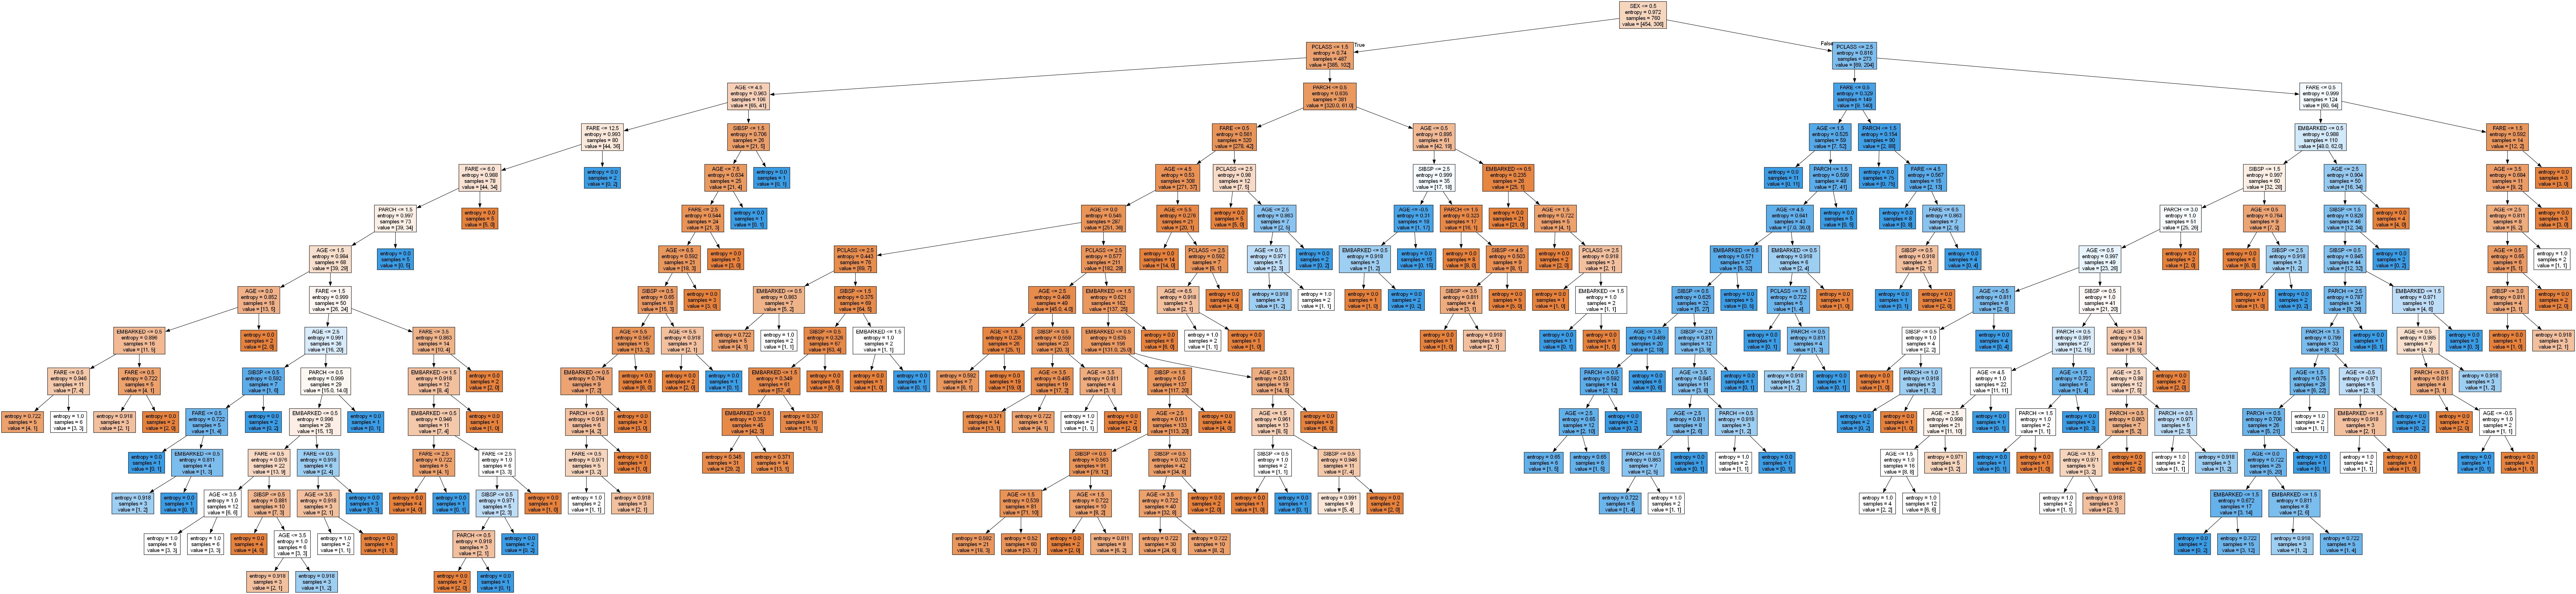

In [23]:
from sklearn import tree
import graphviz
from IPython.display import Image

quantized_features, labels = get_data_and_labels('train.csv')
train_features,train_labels,validation_features,validation_labels = create_training_validation_split(quantized_features, labels, 0.95)

# Initialize a Decision Tree Classifier with Entropy as the criterion (model will be entropy based)
classifier = tree.DecisionTreeClassifier(criterion='entropy')
print("Model created, beginning training...")

# Fit method builds a DecisionTree classifier from the training sample set
classifier.fit(train_features, train_labels)
print("Model training finished!")

# Code to visualize the built DTree
print("Printing model results...")
dot_data = tree.export_graphviz(classifier, out_file=None, feature_names=attribute_list, filled=True)
graph = graphviz.Source(dot_data)
print("Total leaves:", classifier.get_n_leaves())
print("Max depth:", classifier.get_depth())
Image(graph.pipe(format='png'))


### **Pruned Model Training:**

Pruned model created, beginning training...
Pruned model training complete!
Printing model results...
Total leaves: 57
Max depth: 7


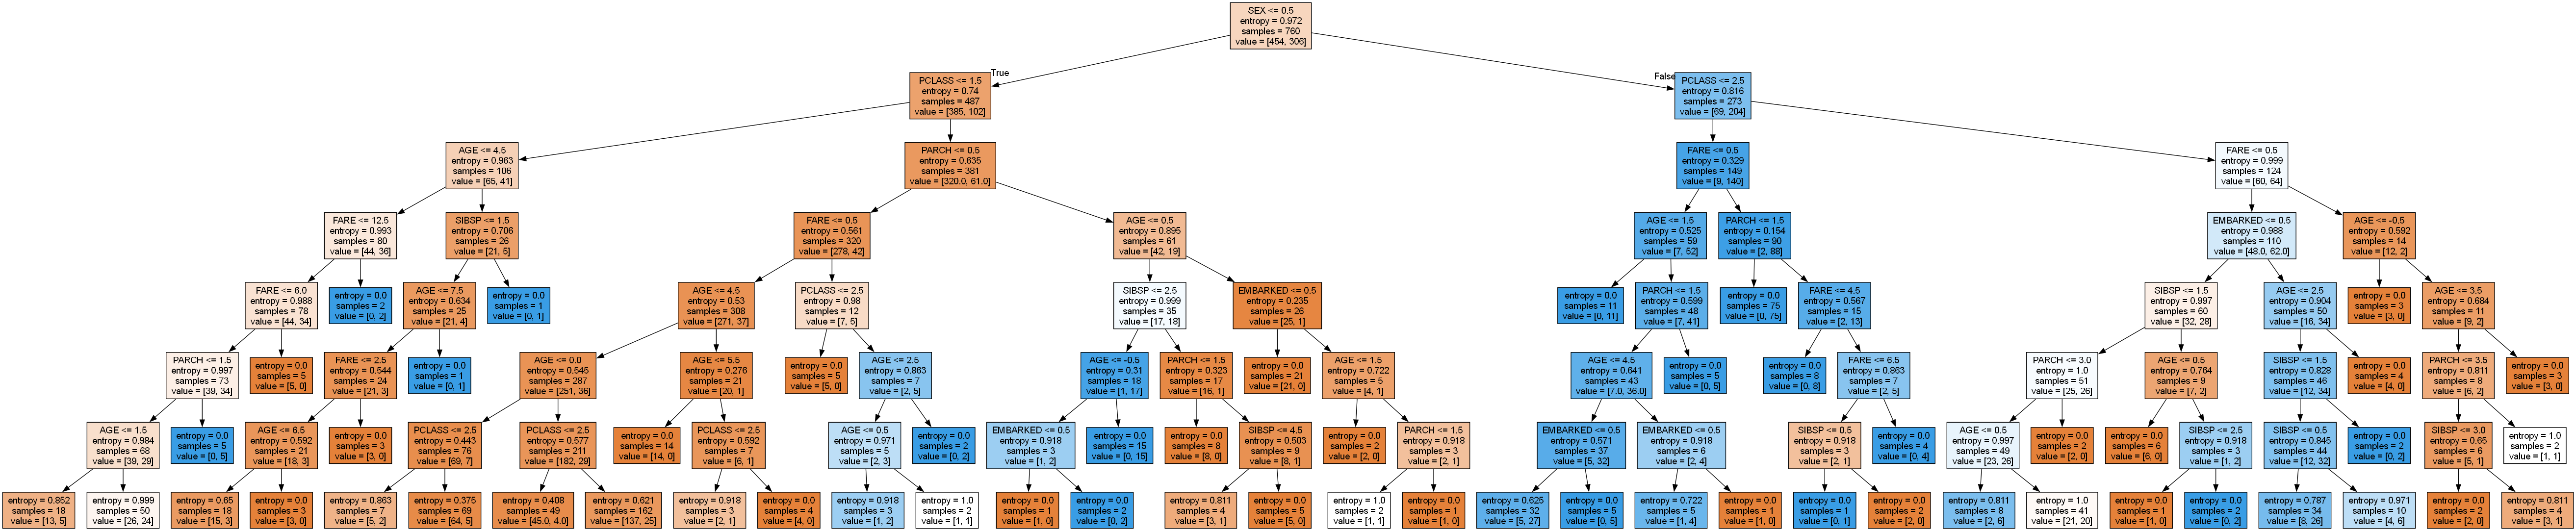

In [24]:
# Model with pruining and setting a max_depth of 7
pruned_classifier = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 7)
print("Pruned model created, beginning training...")

# Fit method builds a DecisionTree classifier from the training sample set
pruned_classifier.fit(train_features, train_labels)
print("Pruned model training complete!")

# Code to visualize the built pruned DTree
print("Printing model results...")
dot_data_pruned = tree.export_graphviz(pruned_classifier, out_file=None, feature_names=attribute_list, filled=True)
graph_pruned = graphviz.Source(dot_data_pruned)
print("Total leaves:", pruned_classifier.get_n_leaves())
print("Max depth:", pruned_classifier.get_depth())
Image(graph_pruned.pipe(format='png'))



### **Model with balanced class weights**

Weighted model created, beginning training...
Weighted model training complete!
Printing model results...
Total leaves: 160
Max depth: 17


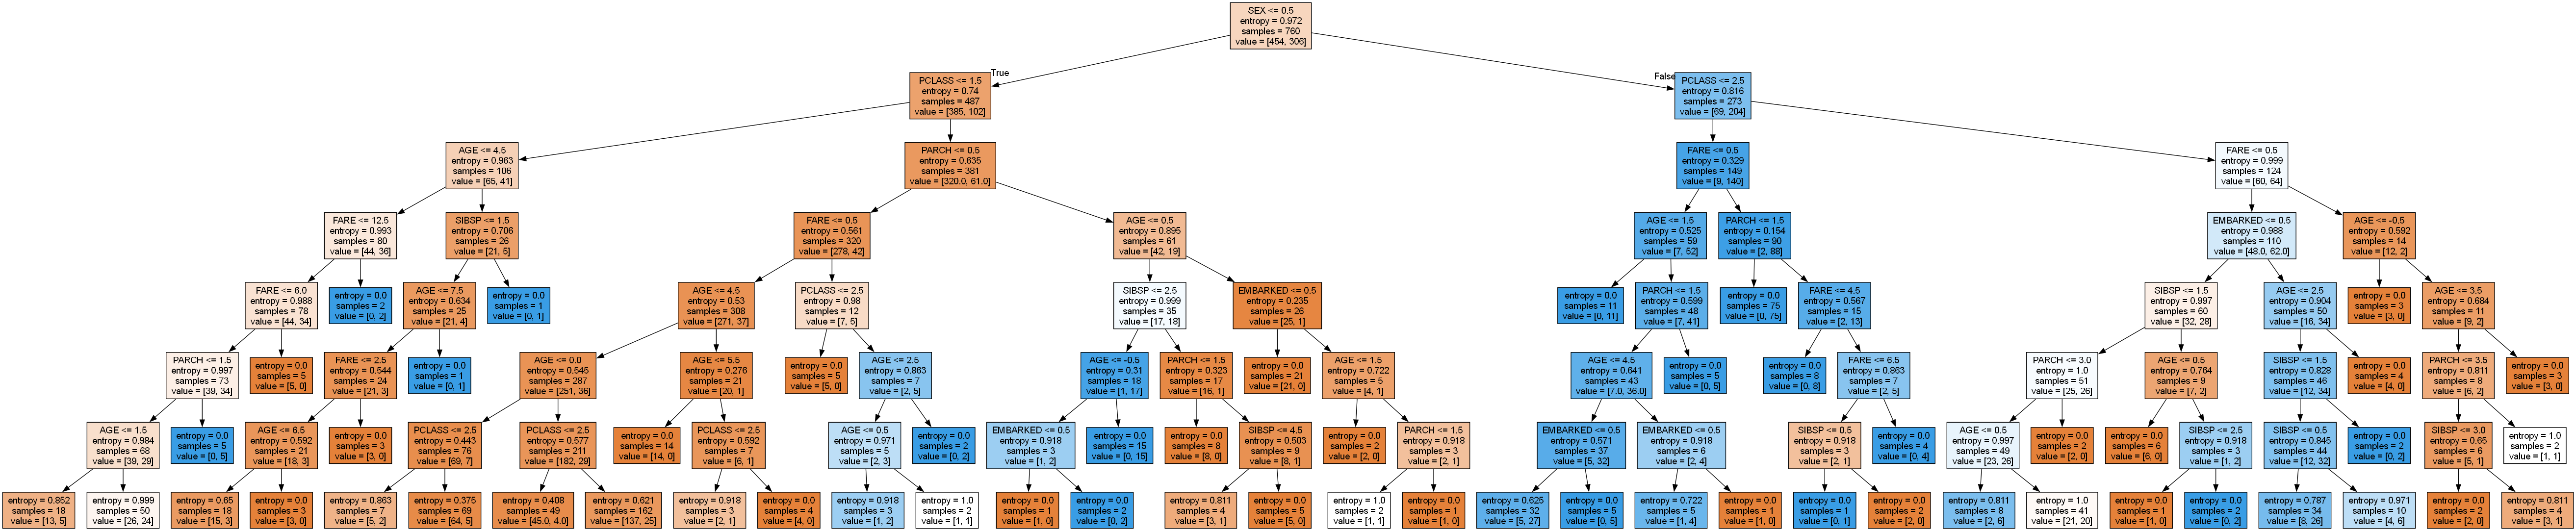

In [25]:
# Model with pruining and setting a max_depth of 7
weighted_classifier = tree.DecisionTreeClassifier(criterion='entropy', class_weight='balanced')
print("Weighted model created, beginning training...")

# Fit method builds a DecisionTree classifier from the training sample set
weighted_classifier.fit(train_features, train_labels)
print("Weighted model training complete!")

# Code to visualize the built pruned DTree
print("Printing model results...")
dot_data_weighted = tree.export_graphviz(weighted_classifier, out_file=None, feature_names=attribute_list, filled=True)
graph_weighted = graphviz.Source(dot_data_pruned)
print("Total leaves:", weighted_classifier.get_n_leaves())
print("Max depth:", weighted_classifier.get_depth())
Image(graph_pruned.pipe(format='png'))


### **Regular Model validation vs Pruned Model validation vs Weight Balanced Model validation**

In [26]:
# Checking the accuracy of the validation set
def accuracy(predictions, labels):
    correct_predictions = 0

    # Iterate over both predictions and labels simultaneously
    for pred, actual in zip(predictions, labels):
        if pred == actual:
            correct_predictions += 1

    # Calculate accuracy as the percentage of correct predictions
    accuracy_percentage = (correct_predictions / len(labels)) * 100
    return accuracy_percentage

# Using the predict method of the classifier to make predictions on the validation_features_array
print("Regular Model Validation:")
validation_predictions = classifier.predict(validation_features)
validation_accuracy = accuracy(validation_predictions, validation_labels)
print("The accuracy of the current model on the validation set is {:.2f}%\n".format(validation_accuracy))

# Pruned DT model
print("Pruned Model Validation:")
pruned_validation_predictions = pruned_classifier.predict(validation_features)
pruned_validation_accuracy = accuracy(pruned_validation_predictions, validation_labels)
print("The accuracy of the current pruned model model on the validation set is {:.2f}%\n".format(pruned_validation_accuracy))

# Class Weight Balanced DT model
print("Balanced Weight Model Validation:")
validation_predictions = weighted_classifier.predict(validation_features)
validation_accuracy = accuracy(validation_predictions, validation_labels)
print("The accuracy of the current model on the validation set is {:.2f}%\n".format(validation_accuracy))


Regular Model Validation:
The accuracy of the current model on the validation set is 90.24%

Pruned Model Validation:
The accuracy of the current pruned model model on the validation set is 92.68%

Balanced Weight Model Validation:
The accuracy of the current model on the validation set is 85.37%



### **Hyperparameter Tuning Model**

The accuracy of the model 10 split and 10 leaf on the validation set is 90.24%
The accuracy of the model 10 split and 15 leaf on the validation set is 90.24%
The accuracy of the model 10 split and 20 leaf on the validation set is 87.80%
The accuracy of the model 10 split and 25 leaf on the validation set is 87.80%
The accuracy of the model 10 split and 35 leaf on the validation set is 92.68%
The accuracy of the model 10 split and 40 leaf on the validation set is 92.68%
The accuracy of the model 10 split and 45 leaf on the validation set is 92.68%
The accuracy of the model 10 split and 50 leaf on the validation set is 92.68%
The accuracy of the model 15 split and 10 leaf on the validation set is 90.24%
The accuracy of the model 15 split and 15 leaf on the validation set is 90.24%
The accuracy of the model 15 split and 20 leaf on the validation set is 87.80%
The accuracy of the model 15 split and 25 leaf on the validation set is 87.80%
The accuracy of the model 15 split and 35 leaf on th

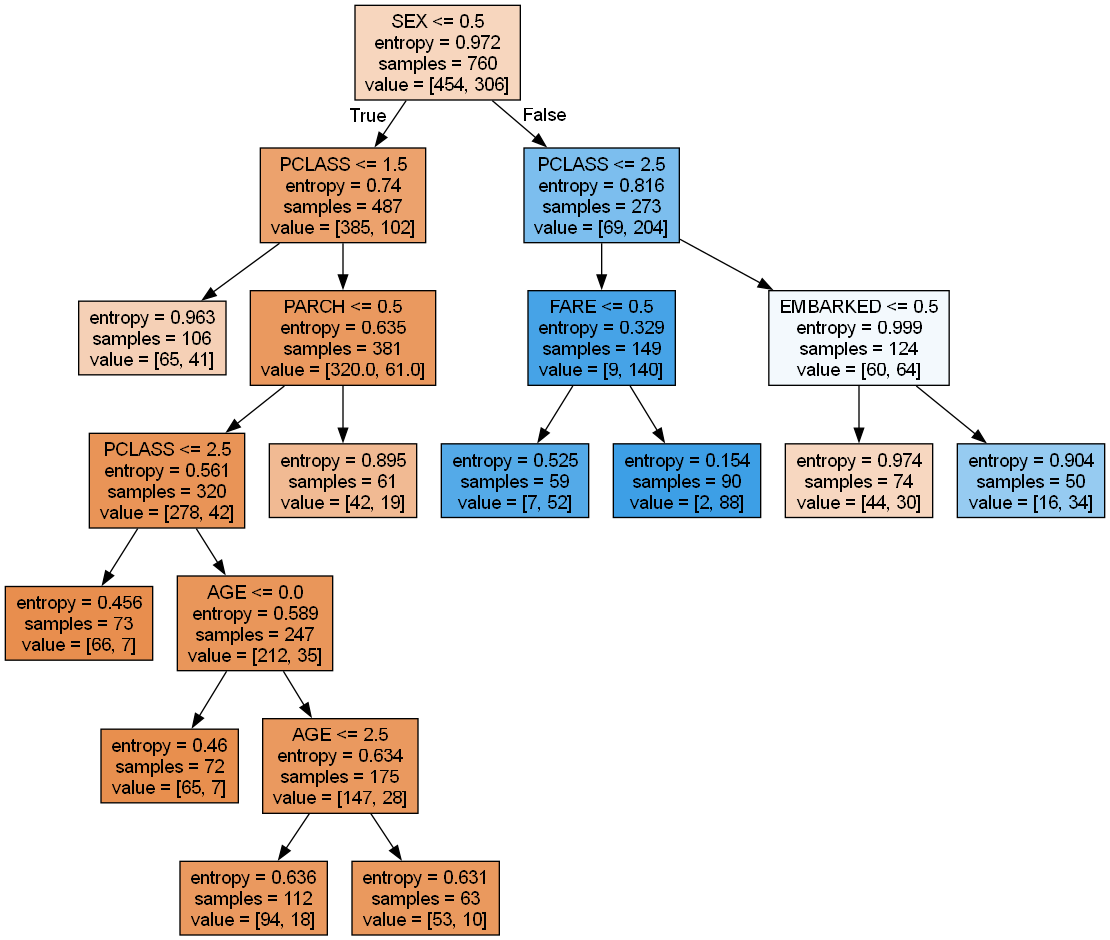

In [27]:
minimum_samples_to_split = [10, 15, 20, 25, 35, 40, 45, 50]
minimum_samples_at_leaf = [10, 15, 20, 25, 35, 40, 45, 50]

best_model = None
best_accuracy = 0

# Going over the different possible combinations of split and leaf samples
for split in minimum_samples_to_split:
  for leaf in minimum_samples_at_leaf:
    pruned_classifier = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split = split, min_samples_leaf = leaf)
    pruned_classifier.fit(train_features, train_labels)
    validation_predictions = pruned_classifier.predict(validation_features)
    validation_accuracy = accuracy(validation_predictions, validation_labels)
    if validation_accuracy > best_accuracy:
      best_accuracy = validation_accuracy
      best_model = pruned_classifier
    print("The accuracy of the model {} split and {} leaf on the validation set is {:.2f}%".format(split, leaf, validation_accuracy))

print("Printing model results...")
print("Best accuracy of model: {:.2f}".format(best_accuracy), "%")
print("Total leaves:", pruned_classifier.get_n_leaves())
print("Max depth:", pruned_classifier.get_depth())
dot_data_pruned = tree.export_graphviz(pruned_classifier, out_file=None, feature_names=attribute_list, filled=True)
graph_pruned = graphviz.Source(dot_data_pruned)

Image(graph_pruned.pipe(format='png'))

### **Model prediction on the test cases**

In [28]:
'''

# Editing original test.csv
import pandas as pd
f = pd.read_csv("test.csv", usecols=[1,3,4,5,6,8,10])
f.to_csv("test.csv", index=False)

'''

'\n\n# Editing original test.csv\nimport pandas as pd\nf = pd.read_csv("test.csv", usecols=[1,3,4,5,6,8,10])\nf.to_csv("test.csv", index=False)\n\n'

In [29]:
"""
# We test our model on the Test Set
quantized_features, labels = get_data_and_labels('test.csv')
test_features, test_labels, validation_features, validation_labels = create_training_validation_split(quantized_features,labels,0.9)

print("Base Model:")
test_predictions = pruned_classifier.predict(test_features)
test_accuracy = accuracy(test_predictions,test_labels)
print("The accuracy of the current model on the test set is {:.2f}%".format(test_accuracy))

print("Pruned Model:")
test_predictions = pruned_classifier.predict(test_features)
test_accuracy = accuracy(test_predictions,test_labels)
print("The accuracy of the current model on the test set is {:.2f}%".format(test_accuracy))

print("Hyperparameter Model")
test_predictions = pruned_classifier.predict(test_features)
test_accuracy = accuracy(test_predictions,test_labels)
print("The accuracy of the current model on the test set is {:.2f}%".format(test_accuracy))
"""

'\n# We test our model on the Test Set\nquantized_features, labels = get_data_and_labels(\'test.csv\')\ntest_features, test_labels, validation_features, validation_labels = create_training_validation_split(quantized_features,labels,0.9)\n\nprint("Base Model:")\ntest_predictions = pruned_classifier.predict(test_features)\ntest_accuracy = accuracy(test_predictions,test_labels)\nprint("The accuracy of the current model on the test set is {:.2f}%".format(test_accuracy))\n\nprint("Pruned Model:")\ntest_predictions = pruned_classifier.predict(test_features)\ntest_accuracy = accuracy(test_predictions,test_labels)\nprint("The accuracy of the current model on the test set is {:.2f}%".format(test_accuracy))\n\nprint("Hyperparameter Model")\ntest_predictions = pruned_classifier.predict(test_features)\ntest_accuracy = accuracy(test_predictions,test_labels)\nprint("The accuracy of the current model on the test set is {:.2f}%".format(test_accuracy))\n'

### **Exporting Final Model**

In [30]:
import pickle
#The should result in a file on your Google Drive Folder on the right
with open("best_model.pkl","wb") as file:
  pickle.dump(best_model, file)